In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
%matplotlib inline

sns.set(rc={'figure.figsize':(12,6)})

In [60]:
df = pd.read_csv('gold_mining_data.csv')

In [61]:
df.head()

,dwarf_id,hired_date,reported_date,gold_mined,hammer_date
0,1,2014-01-01,2014-01-31,656,2014-01-01
1,1,2014-01-01,2014-02-28,565,2014-01-01
2,1,2014-01-01,2014-03-31,516,2014-01-01
3,1,2014-01-01,2014-04-30,568,2014-01-01
4,1,2014-01-01,2014-05-31,556,2014-01-01


In [62]:
df.shape[0]

13493

In [63]:
df.dtypes

dwarf_id          int64
hired_date       object
reported_date    object
gold_mined        int64
hammer_date      object
dtype: object

In [64]:
df.describe()

,dwarf_id,gold_mined
count,13493.000000,13493.000000
mean,724.746387,573.222560
std,645.211463,60.166139
min,1.000000,352.000000
25%,209.000000,533.000000
50%,528.000000,579.000000
75%,1060.000000,618.000000
max,2677.000000,753.000000


In [65]:
df.isna().sum()

dwarf_id         0
hired_date       0
reported_date    0
gold_mined       0
hammer_date      0
dtype: int64

In [66]:
df['hired_date'] = pd.to_datetime(df['hired_date'])
df['hammer_date'] = pd.to_datetime(df['hammer_date'])

In [9]:
# проверяем, есть ли гномы, попавшие в обе группы
df.groupby('dwarf_id')['hammer_date'].nunique() \
  .sort_values(ascending=False)

dwarf_id
1       1
1780    1
1782    1
1783    1
1784    1
       ..
894     1
895     1
896     1
897     1
2677    1
Name: hammer_date, Length: 2677, dtype: int64

In [10]:
# количество отчетов в каждой группе
df.groupby('hammer_date', as_index=False) \
  .reported_date.count()

,hammer_date,reported_date
0,2014-01-01,6777
1,2015-01-01,6716


In [11]:
# количество гномов в каждой группе
df.groupby('hammer_date', as_index=False) \
  .dwarf_id.nunique()

,hammer_date,dwarf_id
0,2014-01-01,531
1,2015-01-01,2146


In [12]:
# минимальное, максимальное и среднее количество отчетов 
df.groupby(['hammer_date','dwarf_id'], as_index=False) \
  .agg({'reported_date': 'count'}) \
  .rename(columns={'reported_date': 'count_reports'}) \
  .groupby('hammer_date' , as_index=False) \
  .agg({'count_reports': ['min', 'max', 'mean']})

hammer_date count_reports               
                        min max       mean
0  2014-01-01             9  20  12.762712
1  2015-01-01             1   8   3.129543

<AxesSubplot:xlabel='hammer_date', ylabel='gold_mined'>

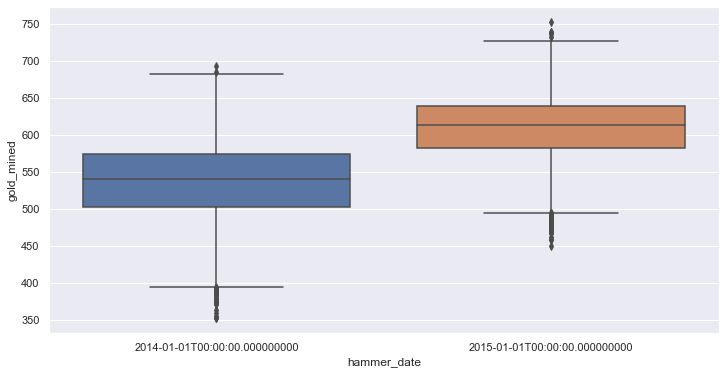

In [13]:
# распределение добытого золота по отчетам
sns.boxplot(x='hammer_date', y='gold_mined', data=df)

In [14]:
# подсчет среднего количества добытого золота в месяц на одного гнома
mean_by_dwarves = df.groupby(['hammer_date','dwarf_id'], as_index=False) \
                    .agg({'gold_mined':'mean'}) \
                    .rename(columns={'gold_mined': 'mean_gold_mined'})

<AxesSubplot:xlabel='hammer_date', ylabel='mean_gold_mined'>

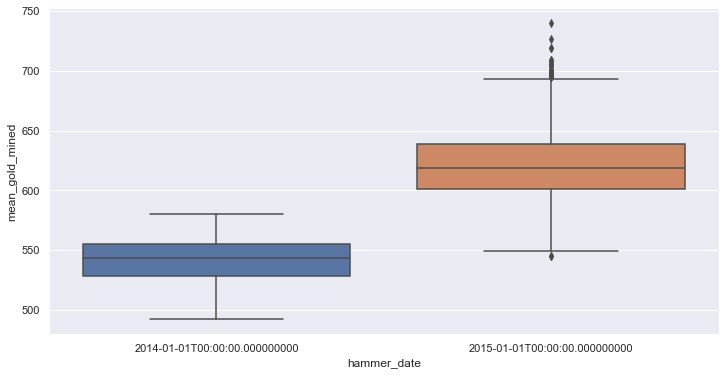

In [15]:
# распределение по среднему количеству добытого золота в месяц на одного гнома
sns.boxplot(x='hammer_date', y='mean_gold_mined', data=mean_by_dwarves)

In [16]:
# нумерация отчетов по каждому гному
df['report_number'] = df.groupby('dwarf_id')['reported_date'].cumcount() + 1

In [17]:
# подсчет среднего по номеру отчета
df_1 = df.groupby(['hammer_date', 'report_number'], as_index=False) \
         .agg({'gold_mined': 'mean'}) \
         .round(1)

In [18]:
df_1

,hammer_date,report_number,gold_mined
0,2014-01-01,1,599.9
1,2014-01-01,2,588.6
2,2014-01-01,3,580.0
3,2014-01-01,4,570.8
4,2014-01-01,5,559.8
5,2014-01-01,6,550.4
6,2014-01-01,7,540.6
7,2014-01-01,8,528.8
8,2014-01-01,9,520.6
9,2014-01-01,10,510.6


<AxesSubplot:xlabel='report_number', ylabel='gold_mined'>

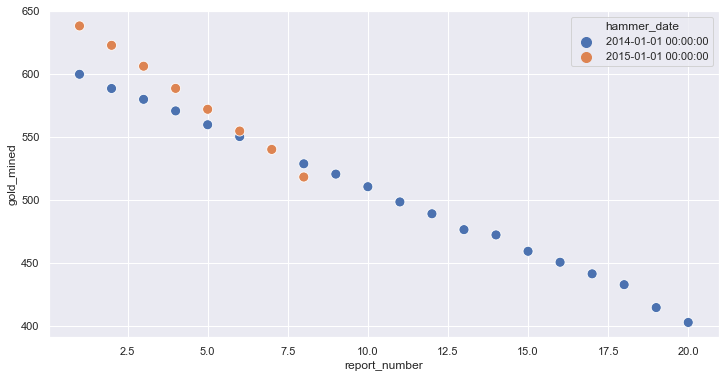

In [19]:
# распределение средних значений по номерам отчетов
sns.scatterplot(x='report_number',
            y='gold_mined',
            hue='hammer_date',
            size = 'hammer_date',
            sizes = (100, 100),
            data=df_1)

## Вывод:

- гномы с инструментами 2-го поколения в первые месяцы дают выше производительность по сравнению с гномами с инструментами 1-го поколения
- со временем производительность гномов с инструментами 2-го поколения падает быстрее чем производительность гномов с инструментами 1-го поколения
- у нас мало данных по производительности инструментов 2-го поколения, возможно следует понаблюдать за результатами еще несколько месяцев
- чтобы в целом оценить какое поколение эффективнее, необходимы данные о стоимости, расходах на обслуживание и сроках эксплуатации каждого поколения инструментов.

In [20]:
# прогноз средних значений по отчетам с 8 по 20 месяц
df_2 = df_1.query('hammer_date == "2015-01-01"')

In [21]:
df_2

,hammer_date,report_number,gold_mined
20,2015-01-01,1,638.3
21,2015-01-01,2,622.9
22,2015-01-01,3,606.3
23,2015-01-01,4,588.7
24,2015-01-01,5,572.1
25,2015-01-01,6,554.8
26,2015-01-01,7,540.2
27,2015-01-01,8,518.3


In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
x = np.array(df_2.report_number).reshape((-1, 1))
y = np.array(df_2.gold_mined)

In [24]:
model = LinearRegression().fit(x, y)

In [25]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9988035137195019


In [26]:
print('intercept:', model.intercept_)

intercept: 656.5178571428571


In [27]:
print('slope:', model.coef_)

slope: [-16.95952381]


In [28]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[639.55833333 622.59880952 605.63928571 588.6797619  571.7202381
 554.76071429 537.80119048 520.84166667]


In [29]:
a = np.array([9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]).reshape((-1, 1))

In [30]:
y_pred = model.predict(a)

In [31]:
print('predicted response:', y_pred, sep='\n')

predicted response:
[503.88214286 486.92261905 469.96309524 453.00357143 436.04404762
 419.08452381 402.125      385.16547619 368.20595238 351.24642857
 334.28690476 317.32738095]


In [43]:
second_generation = pd.DataFrame(y_pred, columns=['gold_mined']).append(df_2, ignore_index=False)

In [48]:
# прогноз производительности за 20 месяцев для инструментов 2-го поколения 
# (сумма средних значений по отчетам за 8 месяцев + результаты прогноза с 9 по 20 месяцы)
second_generation.gold_mined.sum()

9568.857142857143

In [45]:
# подсчет производительности за 20 месяцев для инструментов 1-го поколения
# (сумма средних значений по отчетам за 20 месяцев)
first_generation = df_1.query('hammer_date =="2014-01-01"') \
                       .agg({'gold_mined':'sum'})

In [46]:
first_generation

gold_mined    10088.0
dtype: float64

## Вывод:

Если тенденция снижения производительности с каждым месяцем сохранится, то на дистанции 20 месяцев инструменты 1-го поколения дадут большую производительность по сравнению с инструментами 2-го поколения.